In [1]:
import requests
import time
from time import sleep
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

In [2]:
data = pd.read_csv('Artists.csv')
data.head()

,name,facebook,twitter,website,genre,mtv
0,Adele,http://www.facebook.com/9770929278,http://www.twitter.com/officialadele,NaN,Pop,http://www.mtv.com/artists/adele/biography
1,Joey + Rory,http://www.facebook.com/15044507815,http://www.twitter.com/joeyandrory,NaN,Country,http://www.cmt.com/artists/joey-rory/biography
2,Draaco Aventura,http://www.facebook.com/856796091053581,http://www.twitter.com/DraacoAventura,http://www.bandpage.com/draacoaventura,Pop Latino,http://www.mtv.com/artists/draaco-aventura/bio...
3,Justin Bieber,http://www.facebook.com/309570926875,http://www.twitter.com/justinbieber,http://www.justinbiebermusic.com,Pop,http://www.mtv.com/artists/justin-bieber/biogr...
4,Peer van Mladen,http://www.facebook.com/264487966,http://www.twitter.com/Predrag_Jugovic,http://pejaintergroup.eu/Peer_van_Mladen.html,House,http://www.mtv.com/artists/peer-van-mladen/bio...


In [3]:
genre = data['genre'].tolist()
print(type(genre))
print(genre)

<class 'list'>
['Pop', 'Country', 'Pop Latino', 'Pop', 'House', 'Country', 'Pop', 'Hip-Hop/Rap', 'Country', 'Singer/Songwriter', 'Pop', 'Pop/Rock', 'Pop', 'Pop', 'Hip-Hop', 'Pop', 'Contemporary Country', 'Rap', 'Pop', nan, 'Alternative', 'Hip-Hop', 'Pop/Rock', 'Country', 'Contemporary Country', 'Country', 'Pop', 'Rock', 'Pop', 'Country', 'Hip-Hop/Rap', 'Pop', 'Pop/Rock', nan, 'Country', 'Hip-Hop/Rap', 'Country', 'Hip-Hop', 'Rock', 'Pop', 'Pop', 'Country', 'R&B/Soul', 'Hip-Hop', 'Pop', 'Pop', 'Country', 'Pop', 'Country', 'Hip-Hop/Rap', 'Hip-Hop/Rap', 'Country', 'Alternative', 'R&B/Soul', 'Country', nan, 'Pop', 'Pop/Rock', 'Gangsta Rap', 'Pop', 'Country', 'Country', 'Country', 'World/International', 'Pop/Rock', 'Country', 'Hip-Hop/Rap', 'Country', 'Country', 'Pop', 'Country', 'Hip-Hop/Rap', 'Country', 'Pop', 'Country', 'Country', 'Country', 'Contemporary Country', 'Alternative', 'Rock', 'House', 'Country', 'R&B/Soul', 'Hip-Hop', 'Pop', 'Pop', 'Rock', 'Alternative', 'Indie Rock', 'Contemp

In [25]:
from collections import Counter
words = list(data["genre"])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())
df = [show_key, show_values]
result = pd.concat(df, axis=1)
result.columns = ['genre', 'frequencies']
result.head(5)

,genre,frequencies
0,Pop,217
1,Country,407
2,Pop Latino,3
3,House,15
4,Hip-Hop/Rap,194


In [26]:
genre_counter = Counter(genre)
print(genre_counter)

Counter({nan: 590, 'Country': 407, 'Rock': 391, 'Pop': 217, 'Hip-Hop/Rap': 194, 'Alternative': 142, 'R&B/Soul': 140, 'Hip-Hop': 80, 'Pop/Rock': 54, 'Contemporary Country': 42, 'Latin': 42, 'Soul': 41, 'World/Reggae': 34, 'World/International': 29, 'Metal': 29, 'Electronic': 28, 'Indie Rock': 26, 'Blues/Folk': 26, 'Jazz': 26, 'Alternative Country': 23, 'Rap': 21, 'Classic Rock': 20, 'R&B': 19, 'Inspirational': 19, 'Reggae': 17, 'Singer/Songwriter': 16, 'Dance': 16, 'Americana': 16, 'Electronic/Dance': 16, 'House': 15, 'Traditional Country': 11, 'Dance/Electronic': 9, 'Punk': 9, 'Easy Listening/Vocal': 9, 'Hard Rock': 8, 'Outlaw Country': 8, 'Folk-Rock': 7, 'Contemporary R&B': 7, 'Disco': 7, 'Rock & Roll': 7, 'Electronica': 6, 'World': 6, 'Christian & Gospel': 6, 'Hip Hop': 5, 'Adult Contemporary': 5, 'Alternative Folk': 5, 'West Coast Rap': 5, 'Gangsta Rap': 4, 'Southern Rock': 4, 'New Wave': 4, 'Dancehall': 4, 'Classical': 4, 'Contemporary Singer/Songwriter': 4, 'Pop Latino': 3, 'Alter

In [27]:
import plotly.express as px
px.bar(result, x='genre', y='frequencies', title='number of genre appeared')

In [37]:
genre_counter

Counter({'Pop': 217,
         'Country': 407,
         'Pop Latino': 3,
         'House': 15,
         'Hip-Hop/Rap': 194,
         'Singer/Songwriter': 16,
         'Pop/Rock': 54,
         'Hip-Hop': 80,
         'Contemporary Country': 42,
         'Rap': 21,
         nan: 590,
         'Alternative': 142,
         'Rock': 391,
         'R&B/Soul': 140,
         'Gangsta Rap': 4,
         'World/International': 29,
         'Indie Rock': 26,
         'Hard Rock': 8,
         'Contemporary Folk': 2,
         'Outlaw Country': 8,
         'Alternative Rap': 3,
         'Urban Cowboy': 1,
         'K-Pop': 1,
         'Electronic': 28,
         'Folk-Rock': 7,
         'Alternative Country': 23,
         'Metal': 29,
         'Dance/Electronic': 9,
         'Southern Rock': 4,
         'syndicated_group_a': 1,
         'R&B': 19,
         'Vocal Jazz': 1,
         'Electronica': 6,
         'Bluegrass': 3,
         'New Wave': 4,
         'Reggae': 17,
         'Contemporary R&B': 7,
 

In [40]:
genre_counter = {str(key): int(value) for key, value in genre_counter.items()}

In [41]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import numpy as np
mask = np.array(Image.open("music.jpg"))

In [42]:
wordcloud = WordCloud(width=900, height=400, max_font_size=150, background_color = "white", mask = mask)
wordcloud.generate_from_frequencies(genre_counter)

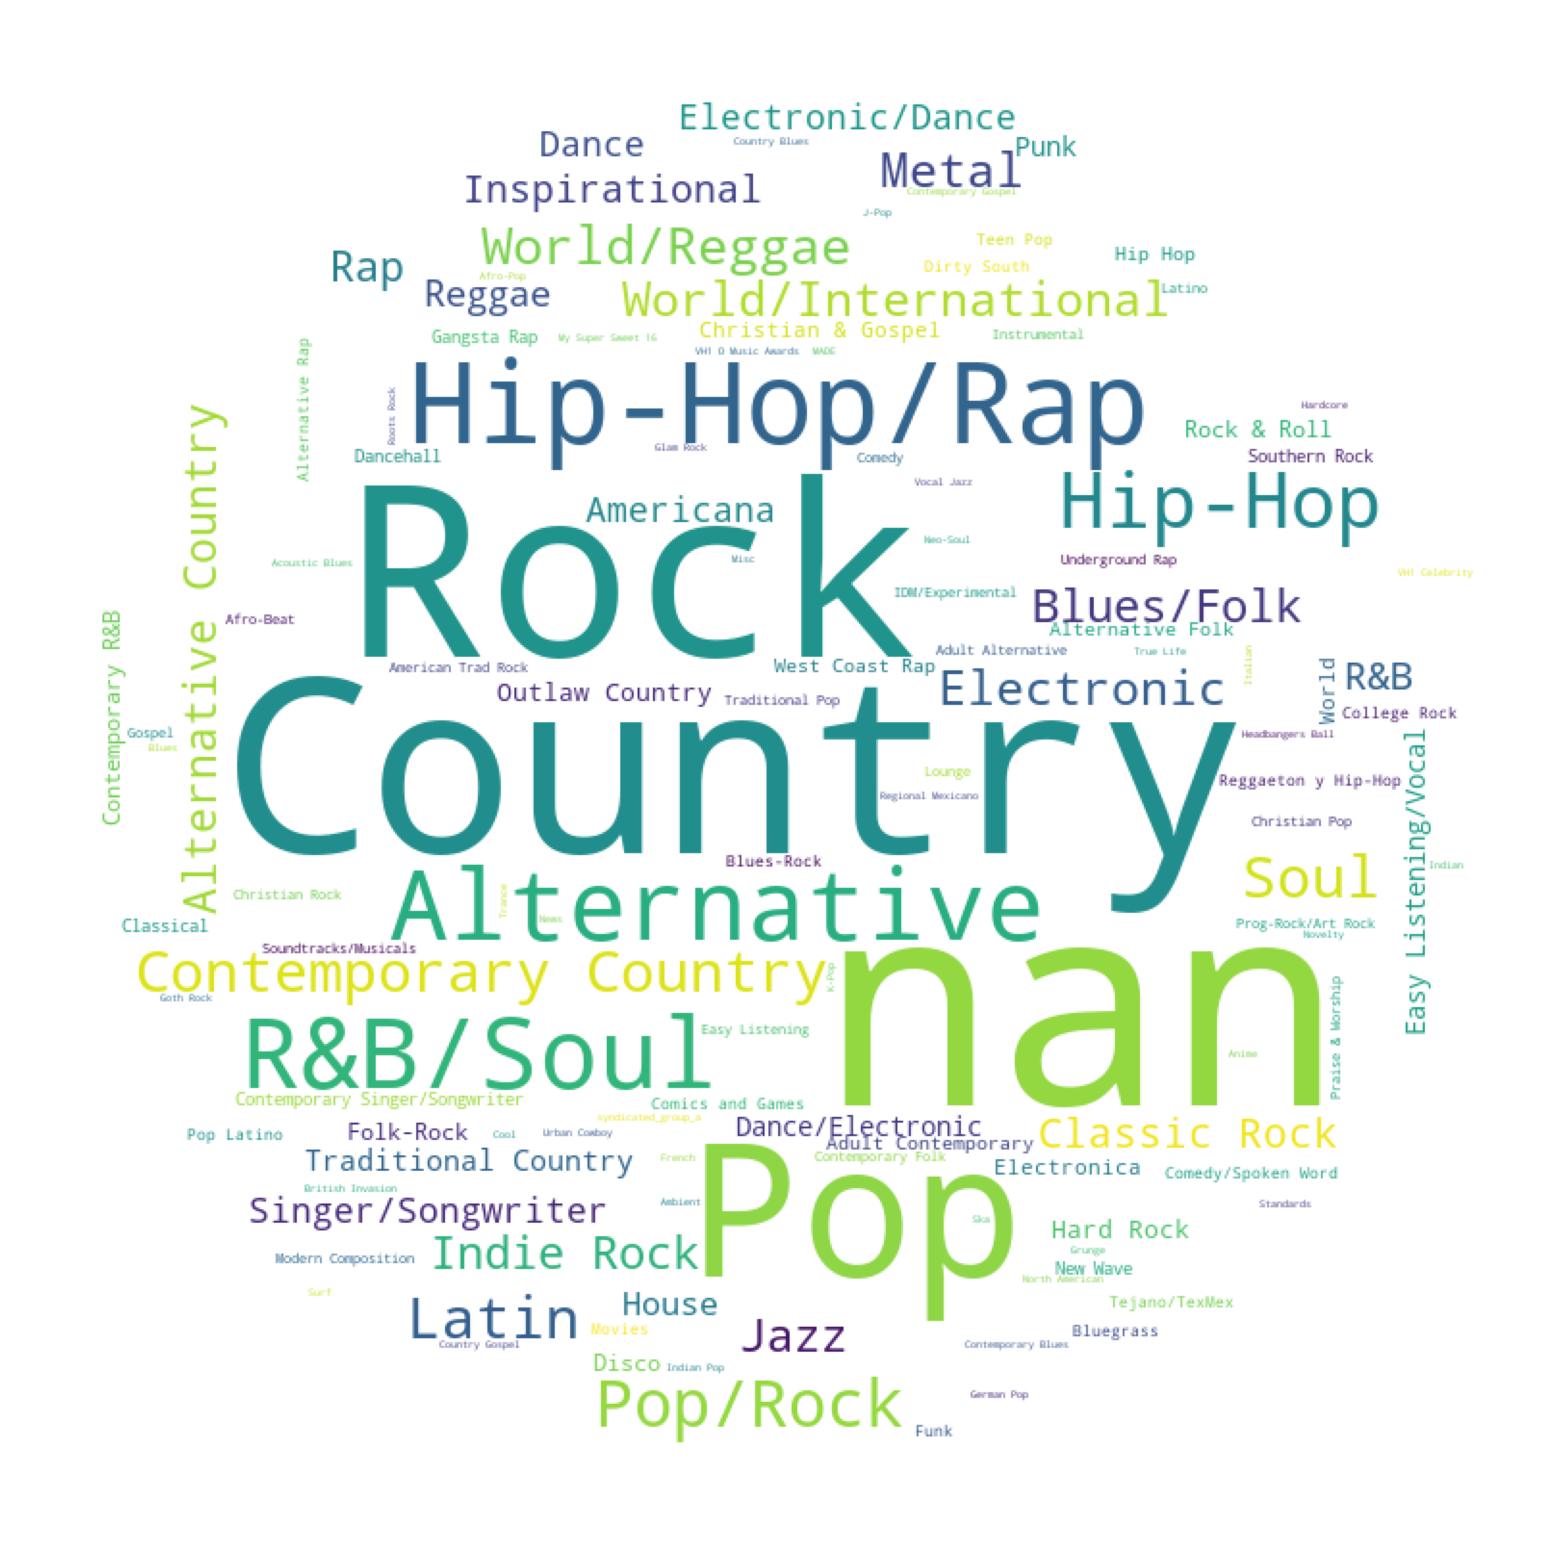

In [43]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off") 
plt.show()